In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re



## 一、任务说明

* 任务主题：论文代码统计，统计所有论文出现代码的相关统计；
* 任务内容：使用正则表达式统计代码连接、页数和图表数据；
* 任务成果：学习正则表达式统计；

## 二、知识讲解

### 2.1 正则表达式

* 从pandas的学习过来，具体的字符匹配不赘述，主要还是应用

## 三、代码实现

统计论文页数，也就是在comments字段中抽取pages和figures和个数，首先完成字段读取。

* 读取数据

In [7]:
data  = [] #初始化
#使用with语句优势：1.自动关闭文件句柄；2.自动显示（处理）文件读取数据异常
with open("D:/z_personal_file/data/arxiv-metadata-oai-snapshot.json", 'r') as f: 
    for idx, line in enumerate(f): 
        d = json.loads(line)
        d = {'abstract': d['abstract'], 'categories': d['categories'], 'comments': d['comments']}
        data.append(d)
        
data = pd.DataFrame(data)
data.head()

,abstract,categories,comments
0,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version"
1,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,To appear in Graphs and Combinatorics
2,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures"
3,We show that a determinant of Stirling cycle...,math.CO,11 pages
4,In this paper we show how to compute the $\L...,math.CA math.FA,None


* 抽取pages

In [9]:
# 使用正则表达式匹配，XX pages
data['pages'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]* pages', str(x)))

# 筛选出有pages的论文
data = data[data['pages'].apply(len) > 0]

# 由于匹配得到的是一个list，如['19 pages']，需要进行转换
data['pages'] = data['pages'].apply(lambda x: float(x[0].replace(' pages', '')))

data['pages'].describe().astype(int)

count    1089180
mean          17
std           22
min            1
25%            8
50%           13
75%           22
max        11232
Name: pages, dtype: int32

对论文页数进行统计，然后按照分类统计论文页数

* 分类统计论文页数

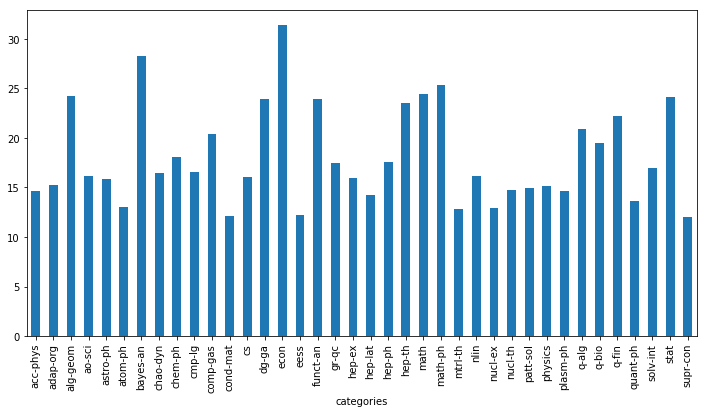

In [10]:
# 选择主要类别
data['categories'] = data['categories'].apply(lambda x: x.split(' ')[0])
data['categories'] = data['categories'].apply(lambda x: x.split('.')[0])

# 每类论文的平均页数
plt.figure(figsize=(12, 6))
data.groupby(['categories'])['pages'].mean().plot(kind='bar')